In [1]:
#importing modules for data preprosessing
import cv2
import os
import numpy as np
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/home/root1/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data is in data_folder 
data_folder = 'data/train_nsob'
#instances and label set
train_data = []
train_labels = []
x = 1
#class_no = 1
#looping trough every instace of a class and appending dataset
for g_class in os.listdir(data_folder):
    for g_class_ex in os.listdir(data_folder+'/'+g_class):
        video_data = []
        for frame in os.listdir(data_folder+'/'+g_class+'/'+g_class_ex):
            frame_data = cv2.imread(data_folder+'/'+g_class+'/'+g_class_ex+'/'+frame)
            frame_data = cv2.resize(frame_data,(57,125),interpolation=cv2.INTER_AREA)
            video_data.append(frame_data)
        print('data added %s'%x)
        x = x + 1
        train_data.append(video_data)
        train_labels.append(int(g_class))
    #class_no += 1
    #if class_no == 15:
        #break

data added 1
data added 2
data added 3
data added 4
data added 5
data added 6
data added 7
data added 8
data added 9
data added 10
data added 11
data added 12
data added 13
data added 14
data added 15
data added 16
data added 17
data added 18
data added 19
data added 20
data added 21
data added 22
data added 23
data added 24
data added 25
data added 26
data added 27
data added 28
data added 29
data added 30
data added 31
data added 32
data added 33
data added 34
data added 35
data added 36
data added 37
data added 38
data added 39
data added 40
data added 41
data added 42
data added 43
data added 44
data added 45
data added 46
data added 47
data added 48
data added 49
data added 50
data added 51
data added 52
data added 53
data added 54
data added 55
data added 56
data added 57
data added 58
data added 59
data added 60
data added 61
data added 62
data added 63
data added 64
data added 65
data added 66
data added 67
data added 68
data added 69
data added 70
data added 71
data added 72
d

data added 564
data added 565
data added 566
data added 567
data added 568
data added 569
data added 570
data added 571
data added 572
data added 573
data added 574
data added 575
data added 576
data added 577
data added 578
data added 579
data added 580
data added 581
data added 582
data added 583
data added 584
data added 585
data added 586
data added 587
data added 588
data added 589
data added 590
data added 591
data added 592
data added 593
data added 594
data added 595
data added 596
data added 597
data added 598
data added 599
data added 600
data added 601
data added 602
data added 603
data added 604
data added 605
data added 606
data added 607
data added 608
data added 609
data added 610
data added 611
data added 612
data added 613
data added 614
data added 615
data added 616
data added 617
data added 618
data added 619
data added 620
data added 621
data added 622
data added 623
data added 624
data added 625
data added 626
data added 627
data added 628
data added 629
data added

data added 1105
data added 1106
data added 1107
data added 1108
data added 1109
data added 1110
data added 1111
data added 1112
data added 1113
data added 1114
data added 1115
data added 1116
data added 1117
data added 1118
data added 1119
data added 1120
data added 1121
data added 1122
data added 1123
data added 1124
data added 1125
data added 1126
data added 1127
data added 1128
data added 1129
data added 1130
data added 1131
data added 1132
data added 1133
data added 1134
data added 1135
data added 1136
data added 1137
data added 1138
data added 1139
data added 1140
data added 1141
data added 1142
data added 1143
data added 1144
data added 1145
data added 1146
data added 1147
data added 1148
data added 1149
data added 1150
data added 1151
data added 1152
data added 1153
data added 1154
data added 1155
data added 1156
data added 1157
data added 1158
data added 1159
data added 1160
data added 1161
data added 1162
data added 1163
data added 1164
data added 1165
data added 1166
data add

In [3]:
#converting lists to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [4]:
#checking shape
train_data.shape

(1460, 32, 125, 57, 3)

In [5]:
#saving arrays for later
np.save('train_data.npy',train_data)
np.save('train_labels.npy',train_labels)

In [6]:
#splitting dataset for cross-validation
X_train,X_test,y_train,y_test = train_test_split(train_data,train_labels,test_size=0.2,random_state=4)

In [7]:
# normalizing dataset
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#checking total classes
y_test.shape[1]

35

In [9]:
np.unique(train_labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [10]:
y_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
#importing modules for NN creation
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv3D
from keras.layers.pooling import MaxPooling3D
from keras.optimizers import SGD

In [12]:
def highResNet():
    #initializing sequential model
    model = Sequential()
    #adding layers
    model.add(Conv3D(filters=3,input_shape=(32,125,57,3),kernel_size=(5,7,7),activation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Dropout(0.2))
    model.add(Conv3D(filters=8,kernel_size=(3,5,5),activation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Dropout(0.2))
    model.add(Conv3D(filters=32,kernel_size=(3,5,5),activation='relu'))
    model.add(MaxPooling3D(pool_size=(1,2,1)))
    model.add(Conv3D(filters=32,kernel_size=(3,5,3),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=35,activation='softmax'))
    #compiling with SGD that uses nesterov momentum
    #SGD(momentum=0.9,nesterov=True)
    model.compile(loss='categorical_crossentropy',optimizer='adamax',metrics=['accuracy'])
    #returning model
    return model

def lowResNet():
    #initializing sequential model
    model = Sequential()
    #adding layers
    model.add(Conv3D(filters=8,input_shape=(32,62,28,3),kernel_size=(5,5,5),activation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    #model.add(Dropout(0.2))
    model.add(Conv3D(filters=32,kernel_size=(3,5,5),activation='relu'))
    model.add(MaxPooling3D(pool_size=(2,2,2)))
    model.add(Conv3D(filters=64,kernel_size=(3,5,3),activation='relu'))
    model.add(MaxPooling3D(pool_size=(1,4,1)))
    #model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=35,activation='softmax'))
    #compiling with SGD that uses nesterov momentum
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    #returning model
    return model

def VGGnet():
    #initializing sequential model
    model = Sequential()
    

In [13]:
# build the model
model = highResNet()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=40)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 1168 samples, validate on 292 samples
Epoch 1/100
1168/1168 [==============================] - 71s - loss: 3.5526 - acc: 0.0265 - val_loss: 3.5417 - val_acc: 0.0205
Epoch 2/100
1168/1168 [==============================] - 60s - loss: 3.5253 - acc: 0.0325 - val_loss: 3.5203 - val_acc: 0.0479
Epoch 3/100
1168/1168 [==============================] - 60s - loss: 3.5152 - acc: 0.0334 - val_loss: 3.5157 - val_acc: 0.0479
Epoch 4/100
1168/1168 [==============================] - 60s - loss: 3.4972 - acc: 0.0420 - val_loss: 3.5154 - val_acc: 0.0240
Epoch 5/100
1168/1168 [==============================] - 60s - loss: 3.4978 - acc: 0.0334 - val_loss: 3.5005 - val_acc: 0.0103
Epoch 6/100
1168/1168 [==============================] - 60s - loss: 3.4625 - acc: 0.0505 - val_loss: 3.4967 - val_acc: 0.0274
Epoch 7/100
1168/1168 [==============================] - 60s - loss: 3.4537 - acc: 0.0454 - val_loss: 3.4859 - val_acc: 0.0171
Epoch 8/100
1168/1168 [==============================] - 60s - l

1168/1168 [==============================] - 61s - loss: 0.6345 - acc: 0.7877 - val_loss: 2.2012 - val_acc: 0.4315
Epoch 65/100
1168/1168 [==============================] - 61s - loss: 0.6279 - acc: 0.8014 - val_loss: 2.2812 - val_acc: 0.4178
Epoch 66/100
1168/1168 [==============================] - 61s - loss: 0.7059 - acc: 0.7620 - val_loss: 2.2207 - val_acc: 0.4384
Epoch 67/100
1168/1168 [==============================] - 61s - loss: 0.6079 - acc: 0.7988 - val_loss: 2.1953 - val_acc: 0.4315
Epoch 68/100
1168/1168 [==============================] - 61s - loss: 0.6065 - acc: 0.8048 - val_loss: 2.2192 - val_acc: 0.4349
Epoch 69/100
1168/1168 [==============================] - 61s - loss: 0.5924 - acc: 0.8099 - val_loss: 2.1969 - val_acc: 0.4247
Epoch 70/100
1168/1168 [==============================] - 61s - loss: 0.5621 - acc: 0.8159 - val_loss: 2.2339 - val_acc: 0.4521
Epoch 71/100
1168/1168 [==============================] - 61s - loss: 0.5192 - acc: 0.8330 - val_loss: 2.3637 - val_a

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])


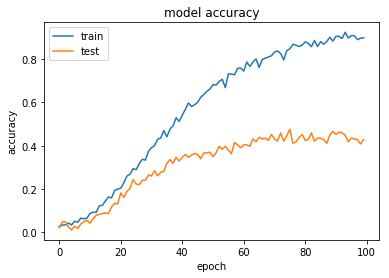

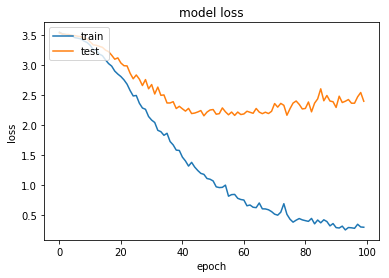

In [14]:
model.save_weights("gesture_15_classes.h5")
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()